In [1]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

In [3]:
# Image Widget

file = open("grandma.jpg", "rb")
image = file.read()

image_headline = widgets.Image(
                    value=image,
                    format='jpg',
                    width='300'
                )

label_headline = widgets.Label(
                    value='Photo by CDC on Unsplash',
                    style={'description_width': 'initial'}
                )

vbox_headline = widgets.VBox([image_headline, label_headline])

In [4]:
# grandson/granddaughter

grand = widgets.ToggleButtons(
            options=['grandson', 'granddaughter']
        )

In [5]:
# name

name = widgets.Text(placeholder='Your name here')

In [6]:
date = widgets.DatePicker(description='Pick a Date')

In [7]:
# number of friends

friends = widgets.IntSlider(
            value=3, # default value
            min=0, 
            max=10,
            step=1,
            style={'description_width': 'initial', 'handle_color': '#16a085'} 
        )

In [8]:
# button send

button_send = widgets.Button(
                description='Send to grandma',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Sent message: ")
        print(f"Dear Grandma! This is your favourite {grand.value}, {name.value}.")
        print(f"I would love to come over on {date.value} for dinner, if that's okay for you!")
        print(f"Also, if you don't mind, I'll bring along {friends.value} hungry ghosts for your delicious food!")

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

In [9]:
# stacked right hand side

text_0 = widgets.HTML(value="<h1>Dear Grandma!</h1>")
text_1 = widgets.HTML(value="<h2>This is your favourite</h2>")
text_2= widgets.HTML(value="<h2>I would love to come over on </h2>")
text_3= widgets.HTML(value="<h2>for dinner, if that's okay for you!</h2>")
text_4= widgets.HTML(value="<h2>Also, if you don't mind, I'll bring along </h2>")
text_5= widgets.HTML(value="<h2>hungry ghosts for dinner, if that's okay for you!</h2>")
text_6=widgets.HTML(value="<h2>seaborn</h2>")

#vbox_text = widgets.VBox([text_0, text_1, grand, name, text_2, date, text_3, text_4, friends, text_5, vbox_result,text_6])
vbox_text = widgets.VBox([text_6])


In [10]:
#page = widgets.HBox([vbox_headline, vbox_text])

page = widgets.HBox([vbox_text])
display(page)

In [11]:
import pandas as pd


In [12]:
df = pd.read_csv('crime_and_incarceration_by_state.csv')
#df

In [13]:
#df.info()

In [14]:
df.drop(columns=['rape_revised'], inplace=True)
#df

In [15]:
df[df['jurisdiction'] == 'FEDERAL']
federal_rows = df[df['jurisdiction'] == 'FEDERAL']
df.drop(federal_rows.index, inplace=True)
#df

In [16]:
#df.info()

In [17]:
# based on the above summary, one row is missing data
# here is an attempt to find it
#df[df['crime_reporting_change'].isna()]

In [18]:
df[df['jurisdiction'] == 'NEW YORK']
df.drop(746, inplace=True)

In [19]:
df[df['rape_legacy'].isna()]
df.drop(df[df['rape_legacy'].isna()].index, inplace=True)
df_copy = df.copy()
numerical_columns = ['prisoner_count', 'violent_crime_total', 'murder_manslaughter', 'rape_legacy', 'robbery', 'agg_assault', 'property_crime_total', 'burglary', 'larceny', 'vehicle_theft']
for column in numerical_columns:
    df[column] /= df['state_population']
#df.head()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
numerical_features = df.select_dtypes(['int64', 'float64'])
df['crime_reporting_change'] = df['crime_reporting_change'].apply(lambda x: 1 if x == 'True' else 0)
df['crimes_estimated'] = df['crimes_estimated'].apply(lambda x: 1 if x == 'True' else 0)



In [21]:
df = pd.get_dummies(df, columns=['jurisdiction'])
df['year'] = scaler.fit_transform(df[['year']])
numerical_features = df.select_dtypes(['int64', 'float64'])
#df

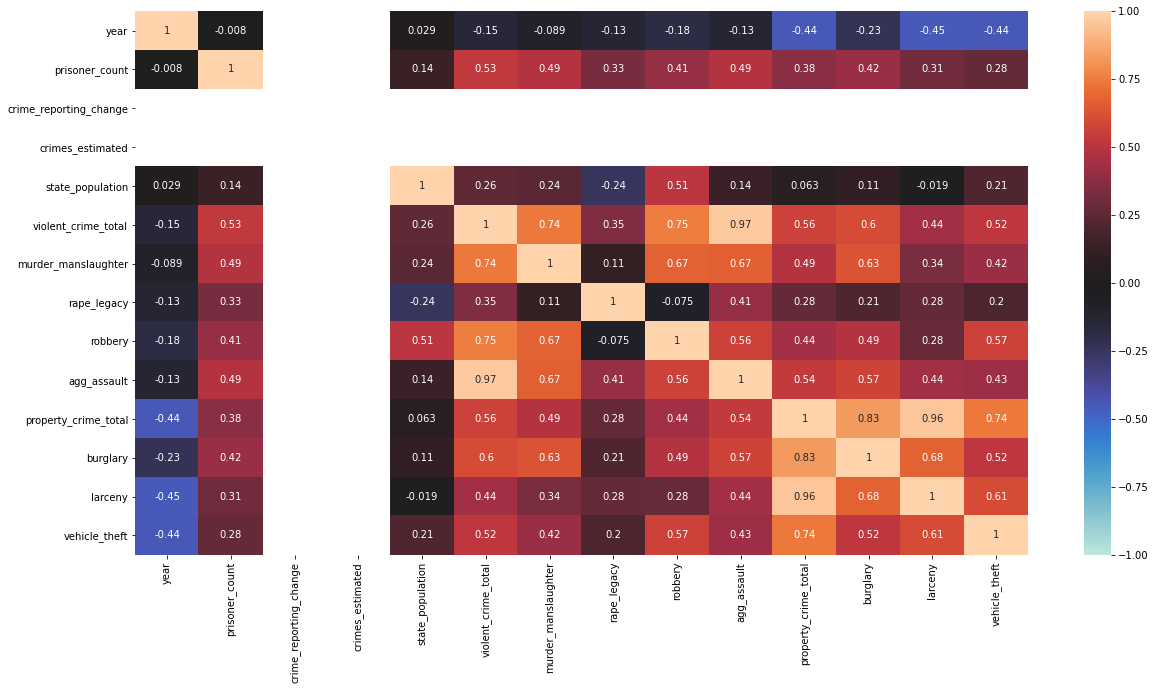

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(1,1))
g = sns.heatmap(numerical_features.corr(),annot=True,vmin=-1, vmax=1,center=0)
g.figure.set_size_inches(20,10)

In [23]:
#vbox_text = widgets.VBox([text_0, text_1, grand, name, text_2, date, text_3, text_4, friends, text_5, vbox_result,text_6])
#page = widgets.HBox([vbox_headline, vbox_text])
#display(page)

In [24]:
text_7= widgets.HTML(value="<h2>Plot </h2>")
vbox_text = widgets.VBox([text_7])
page = widgets.HBox([vbox_text])
display(page)

In [25]:
df.drop(columns=['violent_crime_total', 'property_crime_total'], inplace=True)
df_poverty_rate = pd.read_csv('poverty_rate_per_year.csv')

df_poverty_rate.rename(columns = {'DATE' : 'Year', 'PPAAUS00000A156NCEN' : 'Poverty_rate'}, inplace = True)
df_poverty_rate = df_poverty_rate.drop(labels = range(0, 12), axis = 0)
df_poverty_rate = df_poverty_rate.drop(labels = range(28, 31), axis = 0)
df_poverty_rate = df_poverty_rate.reset_index(drop = True)
df_poverty_rate['Year'] = df_poverty_rate['Year'].astype(str)
df_poverty_rate['Year'] = df_poverty_rate['Year'].str.slice(0, 4, 1)
df_poverty_rate['Year'] = df_poverty_rate['Year'].astype(int)

#df_poverty_rate

In [26]:
#df_copy.head()

In [27]:

df_copy["poverty_rate"] = ""

df_copy.loc[df_copy['year'] == 2001, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][0]
df_copy.loc[df_copy['year'] == 2002, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][1]
df_copy.loc[df_copy['year'] == 2003, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][2]
df_copy.loc[df_copy['year'] == 2004, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][3]
df_copy.loc[df_copy['year'] == 2005, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][4]
df_copy.loc[df_copy['year'] == 2006, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][5]
df_copy.loc[df_copy['year'] == 2007, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][6]
df_copy.loc[df_copy['year'] == 2008, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][7]
df_copy.loc[df_copy['year'] == 2009, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][8]
df_copy.loc[df_copy['year'] == 2010, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][9]
df_copy.loc[df_copy['year'] == 2011, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][10]
df_copy.loc[df_copy['year'] == 2012, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][11]
df_copy.loc[df_copy['year'] == 2013, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][12]
df_copy.loc[df_copy['year'] == 2014, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][13]
df_copy.loc[df_copy['year'] == 2015, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][14]
df_copy.loc[df_copy['year'] == 2016, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][15]


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def performPolyReg(state, predictor, predicted):
    df_state = df_copy[df_copy['jurisdiction'] == state]
    
    degrees = np.arange(1,11) # array of degree values to try (we want to determine degree with lowest error)

    min_rmse = 1e10 # intialize to really large number
    best_deg = 0 

    X = df_state[predictor].values.reshape(-1,1)
    Y = df_state[predicted].values.reshape(-1,1)

    for deg in degrees:
        poly_reg = PolynomialFeatures(degree = deg)
        X_poly = poly_reg.fit_transform(X.reshape(-1,1))

        # fit must be included in a linear regression model
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly, Y)
        Y_poly_predict = lin_reg.predict(X_poly)

        # calculating rmse
        rmse = np.sqrt(mean_squared_error(Y, Y_poly_predict))

        # If current degree gives a smaller error
        if min_rmse > rmse:
            min_rmse = rmse
            best_deg = deg

    # Plotting polynomial regression for the best degree
    best_poly_reg = PolynomialFeatures(degree = best_deg)
    X_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, Y)
    Y_poly_predict = lin_reg.predict(X_poly)

    plt.scatter(X, Y, color='red')
    plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X.reshape(-1,1))), color='blue')
    plt.xlabel(predictor)
    plt.ylabel(predicted)
    plt.show()
    plt.figure(figsize=(100,100))

    print('Best Degree:', best_deg)
    print('RMSE:', min_rmse)

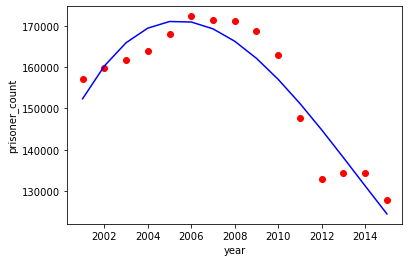

Best Degree: 10
RMSE: 5016.849370103107


<Figure size 7200x7200 with 0 Axes>

In [29]:
performPolyReg('CALIFORNIA', 'year', 'prisoner_count')

In [30]:
!pip freeze > requirements.txt